In [2]:
#Erez Sarousi
#Professor Catie Williams
#DSC 640 - Data Presentation & Visualization
#6/13/2021

In [3]:
#Importing packages
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
import pandas as pd
import re
import seaborn as sns
from textblob import TextBlob

In [4]:
#Loading CSV fles.
air = pd.read_csv('airline-safety.csv')
car = pd.read_csv('traffic-collision-data-from-2010-to-present.csv') #https://www.kaggle.com/cityofLA/los-angeles-traffic-collision-data?select=traffic-collision-data-from-2010-to-present.csv
article = pd.read_csv('abcnews-date-text.csv')

In [5]:
#Reviewing airline head.
air.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


AttributeError: 'Rectangle' object has no property 'kind'

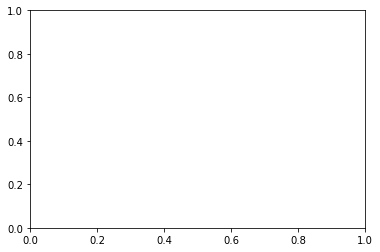

In [6]:
sns.barplot(x='incidents_85_99', y='incidents_00_14', kind='bar', data=air)

In [ ]:
air.head()

In [ ]:
#Cleaning for clarity.
del air['fatalities_85_99']
del air['incidents_85_99']
del air['fatal_accidents_85_99']

In [ ]:
#Finding out how many incidents were in those years.
air.incidents_00_14.max()

In [ ]:
#Copying the df to preserve the original.
aircar = air
aircar.head()

In [ ]:
#Showing how many flight incidents per flight.
plt.figure(figsize=(20, 7))
plt.xticks(rotation=45)
sns.barplot(data=air,x='airline',y='incidents_00_14')

In [ ]:
aircarlen = pd.DataFrame({'Mode': ['Car', 'Air'], 'Years': [4,14]})

In [ ]:
aircarlen 

In [ ]:
sns.barplot(data=aircarlen, x='Mode', y='Years')

In [ ]:
#Adding the new line to the air df with the info from car.
aircar = aircar.append({'airline': 'Air',
                 'incidents_00_14': air.incidents_00_14.max()}, ignore_index=True)

In [ ]:
#Adding the new line to the air df with the info from car.
aircar = aircar.append({'airline': 'Car',
                 'incidents_00_14': car['Date Occurred'].shape[0]},ignore_index=True)

In [ ]:
#Adjusting the only date from car we veed.
car = car[['Date Occurred']]

In [ ]:
#Reviewing car head.
car.head()

In [ ]:
#Filtering the only dates we need so it matches with the airline dates.
car = car[(car['Date Occurred'] < '2014-12-31')]

In [ ]:
#Reviewing article head.
article.head()

In [ ]:
### Sentiment Analysis:
#Lowering the casing.
article['headline_text'] = article['headline_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
article.sample(n=2)

In [ ]:
#Removing punctuation.
article['headline_text'] = article['headline_text'].map(lambda x: re.sub(r'\W+', ' ', x))
article.sample(n=2)

In [ ]:
#Removing stop words.
stop = stopwords.words('english') #stop words = English.
article['headline_text'] = article['headline_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) 
article.sample(n=2)

In [ ]:
#Creating a list of keywords and articles to target planes or flights.
tags = ['plane', 'flight', 'flights', 'airline', 'airplane', 'airlines']
article = article[article['headline_text'].str.lower().str.contains('|'.join(tags))]

In [ ]:
#Defining the sentiment analysis function
def ss(x):
    return TextBlob(x).sentiment 

In [ ]:
#Applying sentiment analysis
article['Score'] = article['headline_text'].apply(ss)
article['Positivity'] = article['Score'].apply(lambda x:x[0])
article['Subjectivity'] = article['Score'].apply(lambda x:x[1])
article.sample(n=2)

In [ ]:
article['publish_date'] = pd.to_datetime(article['publish_date'], format='%Y%m%d') #Reformatting date/time format.
article.sample(n=2)

In [ ]:
#Graphing sentiment analysis
sns.lineplot(x='publish_date',y="Positivity",data=article, lw=1) 

In [ ]:
#Reviewing the new air variable.
air

In [ ]:
aircar

In [ ]:
#Creating a list of numbers from 1-55.
fiftyfive = list(range(56))

In [ ]:
#Dropping the rows by index.
aircar=aircar.drop(fiftyfive)

In [ ]:
aircar

In [ ]:
#Saving this to a csv so it can be used with R.
air.to_csv('airforR.csv')
aircar.to_csv('aircar.csv')

In [ ]:
aircar['incidents_00_14'].max()